In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Generate sample data: y = 4 + 3x + noise
np.random.seed(42)
x = 2 * np.random.rand(100, 1) # generate 100 random number range btw 0 and 2
y = 4 + 3 * x + np.random.rand(100, 1) 

In [9]:
# intialize parameters
theta = np.random.randn(2, 1)
# Add x0 = 1 for each instance (bias term)
x_b = np.c_[np.ones((100, 1)),x] # Add a coloumn of 1s to x (for bias term x0=1)
# Gradient Descent parameters 
learning_rate = 0.1
n_iterations = 1000
m = 100 # Number of samples 
# Cost function (Mean Squarred Error)
def compute_cost(x_b, y, theta):
    m = len(y)
    predictions = x_b.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y)) # calculate the mse cost function
    return cost

In [10]:
# Gradient Descent Algorithm 
def gradient_descent(x_b, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        gradients = (1/m) * x_b.T.dot(x_b.dot(theta)-y)
        theta = theta - learning_rate * gradients
        cost_history[i] = compute_cost(x_b, y , theta)
        return theta, cost_history

In [11]:
# Run Gradient Descent to find optimal parameters
theta_final, cost_history = gradient_descent(x_b, y, theta, learning_rate, n_iterations)
# print the final parameter theta
print("Final Parameters Theta", theta_final)


Final Parameters Theta [[-0.4020213 ]
 [ 1.48030499]]


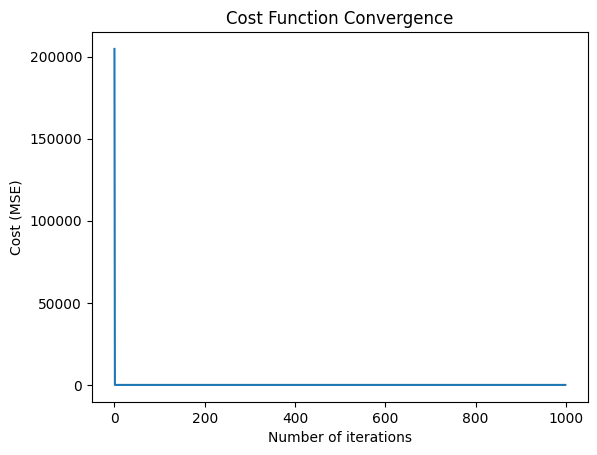

In [12]:
# Plot the cost function to show how it decreases over iterations (convergence)
plt.plot(range(n_iterations), cost_history)
plt.title("Cost Function Convergence")
plt.xlabel("Number of iterations")
plt.ylabel("Cost (MSE)")
plt.show()


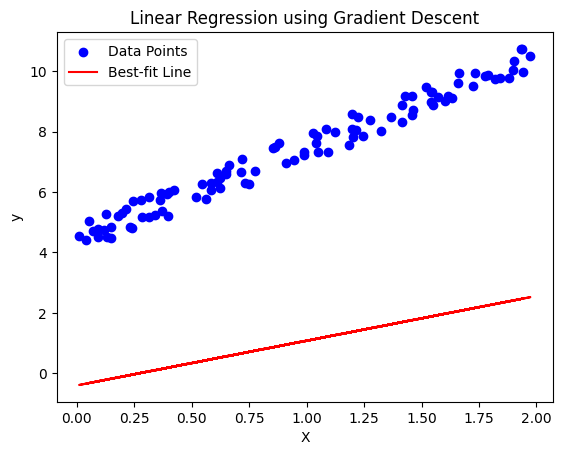

In [14]:
# Plot the original data points and the best-fit line found by Gradient Descent
plt.scatter(x, y, color='blue', label='Data Points') # Scatter plot of original data points
plt.plot(x, x_b.dot(theta_final), color='red', label='Best-fit Line') # Line plot of predictions from the final theta
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()